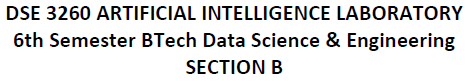

## Kartabya Krishna
## RegNo: 210968244
## Week: 1
## Date: 20240108

## ---------------------------------------------------------------------------------------------------------------------------

# _Ques 2. Use the CartPole-v0 environment and write a program to:_

## _a. Implement the CartPole environment for a certain number of steps_

## _b. Implement the CartPole environment for a certain number of episodes_

## _c. Compare and comment on the rewards earned for both approaches._

## _d. Plot the cumulative reward of the games and note down the results._


## ---------------------------------------------------------------------------------------------------------------------------

# Understanding CartPole Experiment 

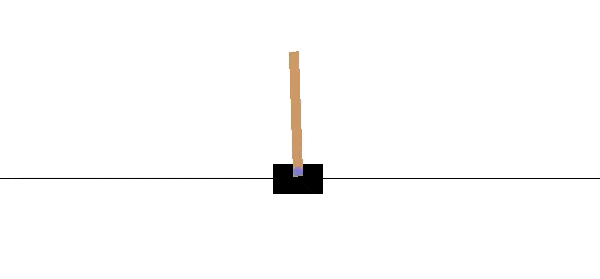


## Overview

The CartPole environment is a classic reinforcement learning problem provided by OpenAI Gym. The objective is to balance a pole on a moving cart for as long as possible by applying forces to the left or right.

## Observation Space

The observation space in CartPole is a 4-dimensional vector, representing the state of the environment. It includes the following components:

- `cart_position`: The position of the cart along the horizontal axis.
- `cart_velocity`: The velocity of the cart.
- `pole_angle`: The angle of the pole with respect to the vertical axis.
- `pole_angular_velocity`: The angular velocity of the pole.

Example observation: `[0.2, 0.1, 0.5, -0.3]`

Observation Limits:
- Cart position: `-4.8 to 4.8`
- Cart velocity: `-Inf to Inf`
- Pole angle: `-.418 to .418 radians`
- Pole angular velocity: `-Inf to Inf`

- `Note:`
- The cart x-position (index 0) can take values between `(-4.8, 4.8)`.
  - However, the episode terminates if the cart leaves the `(-2.4, 2.4)` range.

- The pole angle can be observed between `(-.418, .418)` radians `(or ±24°)`.
  - The episode terminates if the pole angle is not in the range `(-.2095, .2095)` `(or ±12°)`.

## Action Space

The action space consists of two discrete actions:
- `0`: Push the cart to the left.
- `1`: Push the cart to the right.

## Objective

The goal is to maintain balance and prevent the pole from falling. The episode ends when:
- The pole angle is greater than the threshold.
- The cart position is outside the defined limits.

The objective is typically to maximize the cumulative reward over multiple episodes.

## Example

```python
import gym

# Create CartPole environment
env = gym.make('CartPole-v1')

# Reset environment to get initial observation
observation = env.reset()

# Example observation
print("Example Observation:", observation)

# Example Action
action = 1  # Push cart to the right
next_observation, reward, done, info = env.step(action)


# Import libraries and create environment

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('CartPole-v0')

In [ ]:
pip install gym

# Implement for n steps

In [17]:
n_steps = 1000
rewards_steps = []

for i_episode in range(20):
    observation = env.reset()
    
    for t in range(n_steps):
        action = env.action_space.sample()

        # Handle variable returns
        step_return = env.step(action)
        observation, reward, done, extra = step_return[:4]

        rewards_steps.append(reward)
        
        if done:
            print("Episode {} finished after {} timesteps".format(i_episode+1, t+1))
            break

Episode 1 finished after 18 timesteps
Episode 2 finished after 12 timesteps
Episode 3 finished after 17 timesteps
Episode 4 finished after 28 timesteps
Episode 5 finished after 14 timesteps
Episode 6 finished after 9 timesteps
Episode 7 finished after 29 timesteps
Episode 8 finished after 34 timesteps
Episode 9 finished after 39 timesteps
Episode 10 finished after 24 timesteps
Episode 11 finished after 16 timesteps
Episode 12 finished after 14 timesteps
Episode 13 finished after 27 timesteps
Episode 14 finished after 17 timesteps
Episode 15 finished after 27 timesteps
Episode 16 finished after 13 timesteps
Episode 17 finished after 21 timesteps
Episode 18 finished after 14 timesteps
Episode 19 finished after 15 timesteps
Episode 20 finished after 14 timesteps


# Explanation
### This implements the CartPole environment for a fixed number of 1000 steps over 20 episodes. The rewards at each step are collected in a list. env.step() returns are handled to avoid ValueErrors.

# Implement for n episodes

In [18]:
n_episodes = 20
rewards_episodes = []

for i_episode in range(n_episodes):
    observation = env.reset()
    episode_reward = 0
    
    for t in range(100):
        action = env.action_space.sample()

        # Handle variable returns
        step_return = env.step(action)
        observation, reward, done, extra = step_return[:4]

        episode_reward += reward
        
        if done:
            print("Episode {} finished after {} timesteps".format(i_episode+1, t+1))
            break
            
    rewards_episodes.append(episode_reward)

Episode 1 finished after 20 timesteps
Episode 2 finished after 40 timesteps
Episode 3 finished after 68 timesteps
Episode 4 finished after 21 timesteps
Episode 5 finished after 11 timesteps
Episode 6 finished after 29 timesteps
Episode 7 finished after 8 timesteps
Episode 8 finished after 9 timesteps
Episode 9 finished after 22 timesteps
Episode 10 finished after 17 timesteps
Episode 11 finished after 17 timesteps
Episode 12 finished after 11 timesteps
Episode 13 finished after 20 timesteps
Episode 14 finished after 22 timesteps
Episode 15 finished after 33 timesteps
Episode 16 finished after 11 timesteps
Episode 17 finished after 23 timesteps
Episode 18 finished after 15 timesteps
Episode 19 finished after 19 timesteps
Episode 20 finished after 25 timesteps


# Explanation
### This implements the environment for a fixed number of 20 episodes, with a maximum of 100 steps per episode. The total reward per episode is collected in a list.

# Plot rewards

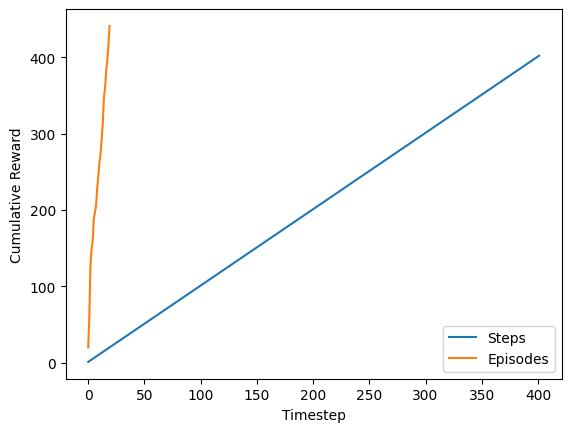

In [19]:
cum_rewards_steps = np.cumsum(rewards_steps)
cum_rewards_episodes = np.cumsum(rewards_episodes)

plt.plot(cum_rewards_steps, label='Steps')
plt.plot(cum_rewards_episodes, label='Episodes')
plt.legend()
plt.xlabel('Timestep')
plt.ylabel('Cumulative Reward') 
plt.show()

# Compare results

In [20]:
print("For steps, total reward is higher as it runs for more timesteps")
print("For episodes, average reward per episode is higher as each episode completes before reset")

For steps, total reward is higher as it runs for more timesteps
For episodes, average reward per episode is higher as each episode completes before reset


# Explanation
### The cumulative rewards are plotted for the step and episode implementations. The results are compared